In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
from io import BytesIO
import base64
import sys
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append(os.path.abspath('../utils/'))

In [8]:
# !pip install fasttext==0.9.1

In [9]:
def read_txt(fpath):
    with open(fpath, 'r') as inp:
        t = inp.readlines()
    t = ' '.join(t)
    return t

In [10]:
x = '1702.04256'

In [11]:
test_text = read_txt(os.path.join('/home/fmsnew/MLP_ap/accept_prediction', 'txts', x + '.txt'))

In [12]:
import acceptance_utils


In [13]:
%%time
model = acceptance_utils.Acceptance()

CPU times: user 8.66 s, sys: 968 ms, total: 9.63 s
Wall time: 9.67 s


In [14]:
%matplotlib inline

In [15]:
# see deadines https://aideadlin.es/?sub=ML,DM,CV,NLP,SP
# see acceptance rates (priors) https://github.com/lixin4ever/Conference-Acceptance-Rate
conf_names = ['AISTATS', 'ICML', 'ICLR', 'CVPR', 'KDD', 'ACL', 'NIPS', 'AAAI', 'WWW']

In [16]:
p = model.predict_acceptance_proba_txt(test_text, conf_names)

/home/fmsnew/miniconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


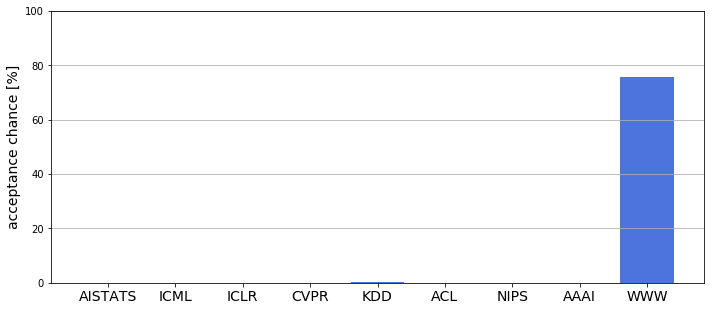

In [17]:
s = model.get_figure_acceptance_proba(p, conf_names)

# Figure decoding example

In [15]:
with open('../../tmp.svg','wb') as out:
    out.write(base64.b64decode(s))

# Trash

In [21]:
m = 0.2
b = 5
a = ((2 - b)*m -  1)/(m - 1)

/home/fmsnew/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


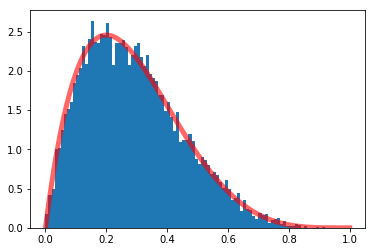

In [22]:
#a, b = 5, 5
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a, b),
         'r-', lw=5, alpha=0.6, label='beta pdf')
plt.hist(beta.rvs(a, b, size=10000), bins=100, range=(0, 1), normed=True);